# get the ingredients 

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# let's get the data
data = pd.read_csv('customer_churn.csv') 

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.shape

(7043, 21)

In [6]:
#get some statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# a bit of data exploration 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#no null values, this is great!
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
data.columns=data.columns.str.lower()

In [10]:
data['churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: churn, dtype: object

In [11]:
#checking the target value distribution.. how many ppl abandon/are leaving the company in %?
data['churn'].value_counts(normalize=True)*100
# the data is imbalanced

No     73.463013
Yes    26.536987
Name: churn, dtype: float64

In [12]:
data['churn'].value_counts ()

No     5174
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

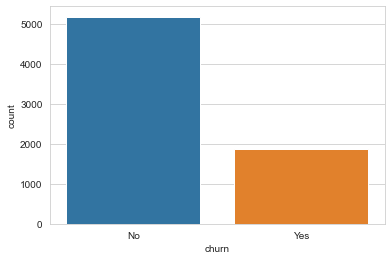

In [13]:
sns.countplot(x='churn', data=data)

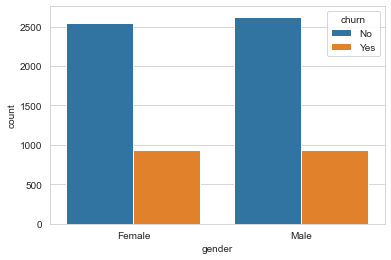

In [14]:
sns.countplot(x='gender', hue= 'churn', data=data);
#gender has no influence 

In [15]:
# let's get numerical and categrical data 
numericals= data.select_dtypes(np.number)
#or another approach numerics= data._get_numeric_data()

In [16]:
numericals

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


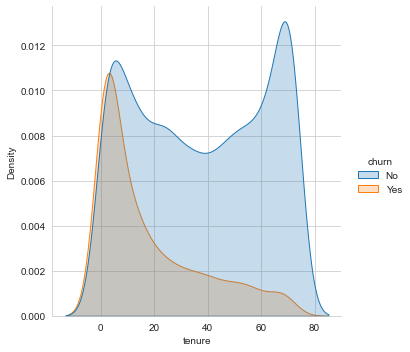

In [17]:
sns.displot(data, x="tenure", hue="churn", kind="kde", fill=True)

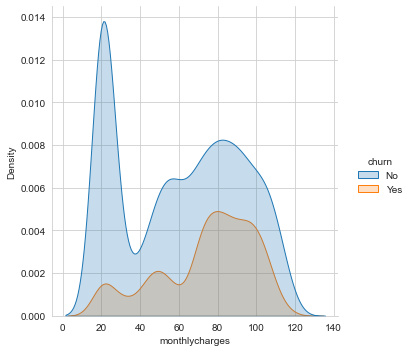

In [18]:
sns.displot(data, x="monthlycharges", hue="churn", kind="kde", fill=True)

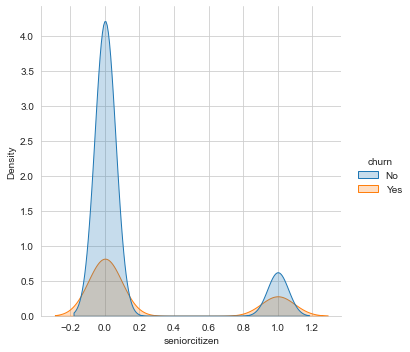

In [19]:
sns.displot(data, x="seniorcitizen", hue="churn", kind="kde", fill=True)

In [20]:
#what do we see: gender is equally distributed, does not tell us anything-just to practice
# most of customer are young
# there are many new customers and old / loyal customers above 70 months--widly distributed 
#Monthly charges between 20 eur to 120eur per customer with a huge percentage of customers on 20.

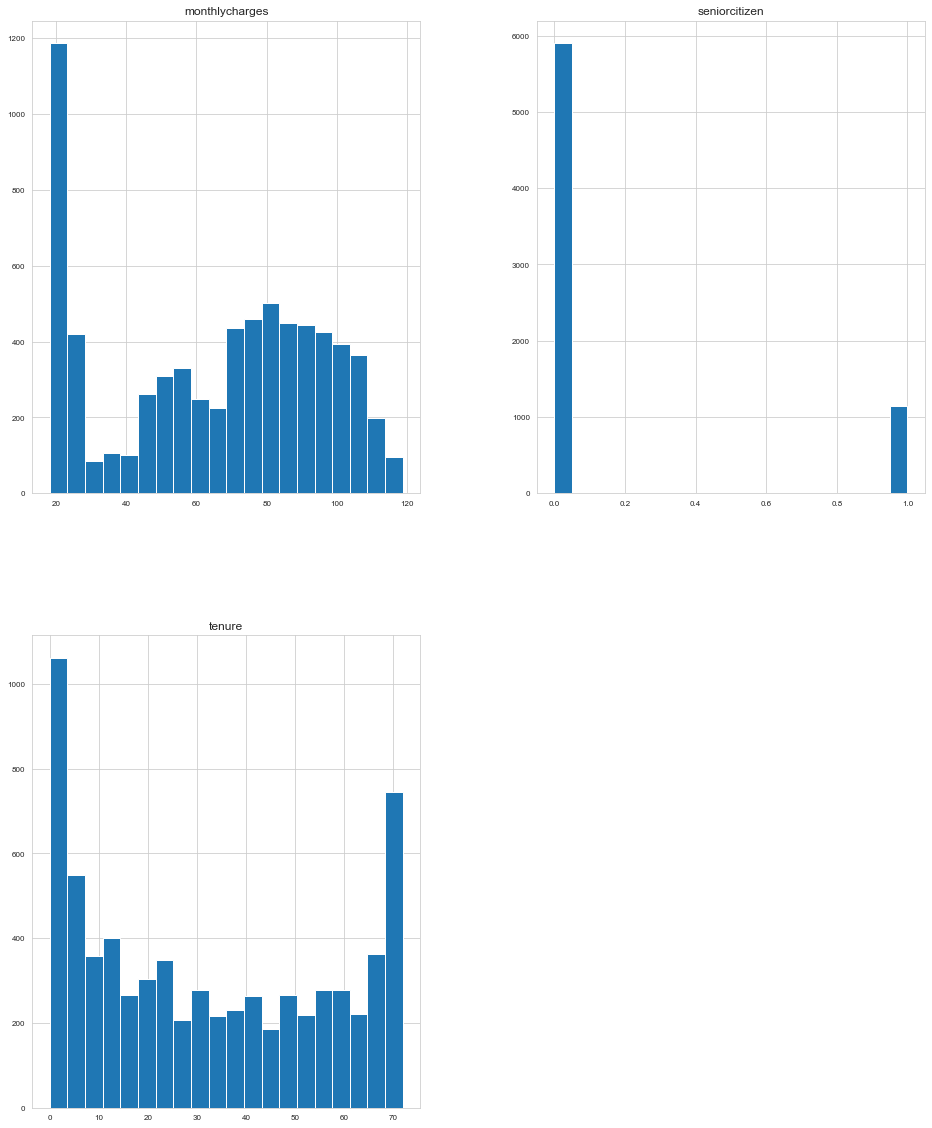

In [21]:
numericals.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);
#data[data.churn=='No'][numericals].hist(bins=20, color= 'blue', xlabelsize=8, ylabelsize=8);)
#data[data.churn=='No'][numericals].hist(bins=20, color= 'blue', xlabelsize=8, ylabelsize=8);)
# ; avoid having the matplotlib extra information

In [22]:
data['seniorcitizen'].value_counts ()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

In [23]:
data['seniorcitizen'].value_counts (normalize=True)

0    0.837853
1    0.162147
Name: seniorcitizen, dtype: float64

In [24]:
data['tenure'].value_counts ()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Density'>

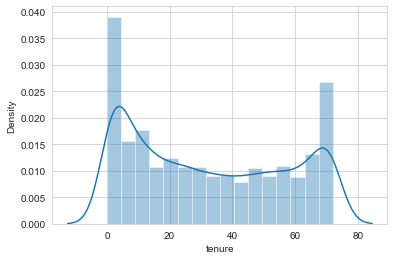

In [25]:
#tenure' histogram
sns.distplot(data['tenure'])

In [26]:
# just to practice the encoding
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [28]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique/ binary values

for col in data.columns:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
           

In [29]:
data.dtypes

customerid           object
gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling      int64
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [30]:
# for categrical values that have more than 2 unique variables, we use either one hot encoding or get dummies
#dummies= pd.get_dummies(data)
#dummies

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   int64  
 4   dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   int64  
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   int64  


##### using logistic regression on values 
- Our Y variable is Churn, our feature variables/predictors are tenure, SeniorCitizen,MonthlyCharges.
- we want to analyze and predict who will stop using the company's product / customers retention

In [32]:
#Split the dataset into dependent and independent variables:
outcome=data["churn"]
features=data [["tenure", "seniorcitizen","monthlycharges"]]

In [33]:
outcome #outcome

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [34]:
features #predictors values

,tenure,seniorcitizen,monthlycharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


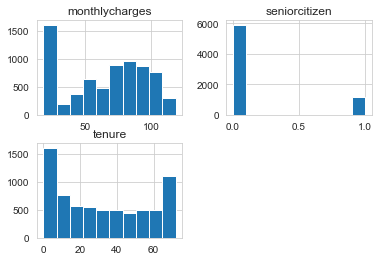

In [35]:
features.hist()
plt.show()

In [36]:
# we need to scale the features values
#we want that all the training and test variables are scaled within a range of 0 to 1.therefore, normalization
features = StandardScaler().fit_transform(features)
#X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
#X_train2.columns = X_train.columns.values
#X_train2.index = X_train.index.values
#X_train = X_train2
#X_test2 = pd.DataFrame(sc_X.transform(X_test))
#X_test2.columns = X_test.columns.values
#X_test2.index = X_test.index.values
#X_test = X_test2

In [37]:
# create training and testing sets: shall we use 80% 20%
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    outcome,stratify=outcome,
                                                    test_size = 0.2,)
#to avoid any class imbalance - use stratify parameter.


In [38]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(5634, 3)
(5634,)
(1409, 3)
(1409,)


In [39]:
#Build the logistic regression model:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report #for model evaluation and improvement

In [40]:
model= LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')
#train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [41]:
#create the prediction on the test data 
predictions=model.predict(X_test)
print (predictions)

[0 1 0 ... 1 0 1]


In [42]:
#for model evaluation and improvemnets 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [43]:
# check precision, recall, f1-score
#-- precision: num. of positive predictions divided by the total number of positive class values predicted. 
#-- Recall: the number of True Positives divided by the number of True Positives
#and the number of False Negatives.
#-- f1_score: 2*((precision*recall)/(precision+recall))

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.51      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [44]:
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
f2 = fbeta_score(y_test, predictions, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.745209   0.513915  0.740642  0.606791   0.68059


In [45]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.81      1035\n           1       0.51      0.74      0.61       374\n\n    accuracy                           0.75      1409\n   macro avg       0.70      0.74      0.71      1409\nweighted avg       0.79      0.75      0.76      1409\n'

In [46]:
#those libraries to plot and see the imbalanced data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

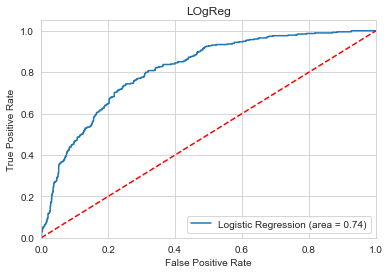

In [49]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))#Predict will give either 0 or 1 as output
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])#Predict_proba will give the only probability of 1.
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOgReg')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 257.44, 'Predicted label')

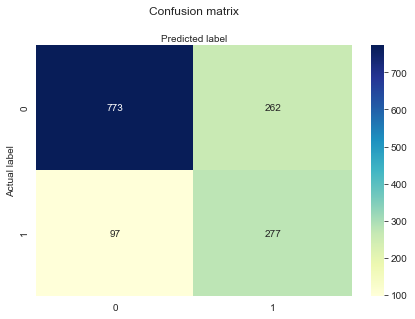

In [52]:
# confusion matrix
# I don't understand the output
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')